In [1]:
# By : Rohit Gupta, Date : Date : 12 July 2021
# Reading and Analyzing covid data from the following kaggle dataset : 
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

import os 

In [32]:
os.getcwd() 
os.chdir("C:\\Users\\....\\Desktop\\Self_Learning\heart_dataset")

In [33]:
 import os
 path = "C:\\Users\\....\\Desktop\\Self_Learning\heart_dataset"
 arr = os.listdir(path)
 print(arr)

['heart.csv', 'o2Saturation.csv']


In [34]:
import pandas as pd
data_heart = pd.read_csv('heart.csv')
data_heart.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data_heart.columns

Index([u'age', u'sex', u'cp', u'trtbps', u'chol', u'fbs', u'restecg',
       u'thalachh', u'exng', u'oldpeak', u'slp', u'caa', u'thall', u'output'],
      dtype='object')

In [6]:
# What does the 1 and 0 stand in the sex column ? Assume 1 stands for male and 0 stands for female. 

data_heart.shape

(303, 14)

In [7]:
# what kind of exploratory data analysis can we perform here ? Let us see 
# the correlation between Age, Sex, exang: exercise induced angina and trtbps : resting blood pressure (in mm Hg). 
# Possibility that with age, and increased stress levels of life, resting blood pressure should increase. 
import seaborn as sns 
import matplotlib.pyplot as plt

# allow plots to occur inline 
%matplotlib inline

In [8]:
data_heart.sort_values(by=['age'],axis=0,ascending=True).head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [65]:
# Using just scatter plots we do not get much insight. However we can use kind = 'reg' to get the how the variables
# are somewhat correlated. 
# sns.pairplot(data_heart, x_vars=['trtbps', 'chol', 'cp'], y_vars=['age'], aspect = 0.5, height = 6, kind='scatter')

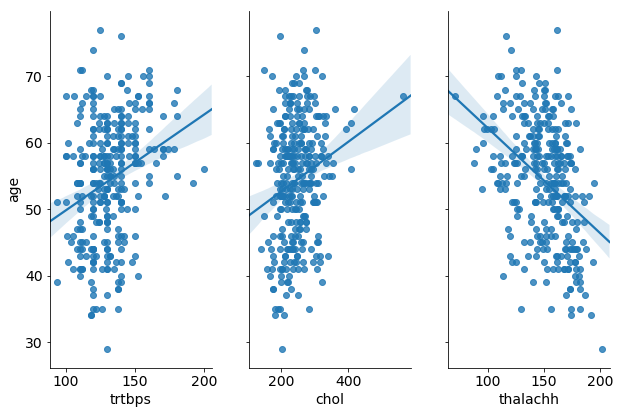

In [228]:
# What other plots can be drawn that provide other descriptive insights into the dataset : 
sns.pairplot(data_heart, x_vars=['trtbps', 'chol', 'thalachh'], y_vars=['age'], aspect = 0.5, height = 6, kind='reg')

In [64]:
# It will be interesting to see how the variables age and rest_ecg are related. 
# sns.pairplot(data_heart, x_vars = ['restecg'], y_vars = ['age'], height = 6 ,aspect = 0.5 ,kind = 'reg')

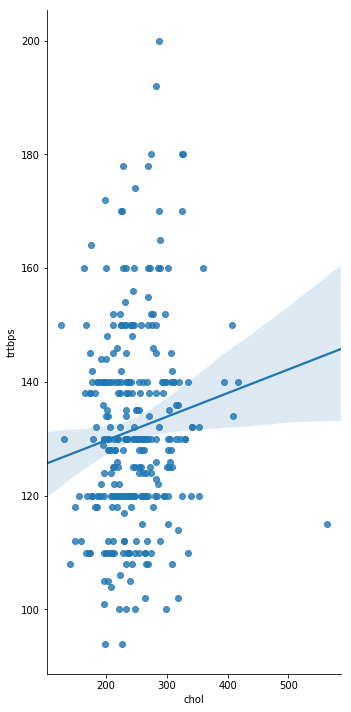

In [24]:
# Further see how other variables are related to each other 
# how is resting blodd pressure associated with cholestrol levels ? 
# In the process determine which features will predict heart attack. 

sns.pairplot(data_heart, x_vars = ['chol'], y_vars = ['trtbps'], height = 10 ,aspect = 0.5 ,kind = 'reg')

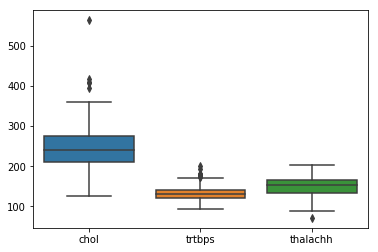

In [25]:
# Draw boxplots to see the measures of the features - since there are several continous variables - 
# using boxplot we can get the distribution of the data. 
#help(sns.boxplot)

feature_cols = ['chol','trtbps','thalachh']
sns.boxplot(data=data_heart[feature_cols])

## Grouped boxplots for Male and Female : 

# select all rows with Sex = 0 ---> Male ----> df1
# select all rows with Sex = 1 ---> Female ---> df 2 

# then compare boxplots across the chol, trtbps and thalachh

In [26]:
data_heart_male = data_heart.loc[data_heart['sex']==0]
data_heart_female = data_heart.loc[data_heart['sex']==1]

In [27]:
data_heart_male.shape

(96, 14)

In [28]:
data_heart_female.shape

(207, 14)

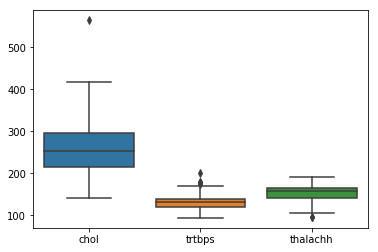

In [17]:
# Category Male boxplot 

feature_cols = ['chol','trtbps','thalachh']
sns.boxplot(data=data_heart_male[feature_cols])

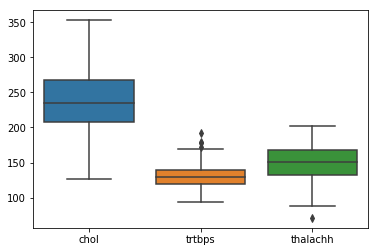

In [18]:
# Category Female boxplots 

feature_cols = ['chol','trtbps','thalachh']
sns.boxplot(data=data_heart_female[feature_cols])

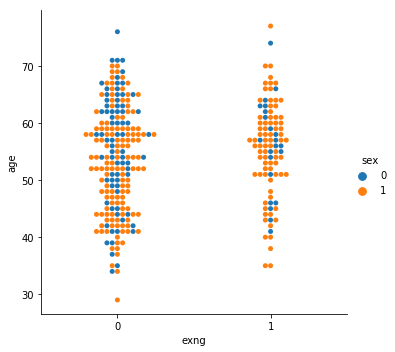

In [43]:
# Visualizing the given categorical data such as  : 
# exang: exercise induced angina (1 = yes; 0 = no) 
# Recall 0 : stands for male and 1 stands for female 

sns.catplot(x="exng", y="age", hue="sex", kind="swarm", data=data_heart)

# We see that excercise induced angina more likely in females than in males.
# Excercise induced angina less in males (as compared to females)

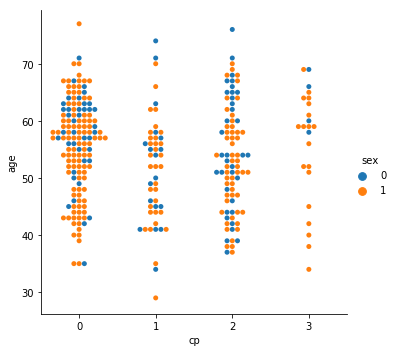

In [59]:
# Visualizing cp vs age : with males/females : 

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

sns.catplot(x="cp", y="age", hue="sex", kind="swarm", data=data_heart)

# vertical positioning of the categorical labels : 
#sns.catplot(x="age", y="cp", hue="sex", kind="swarm", data=data_heart)


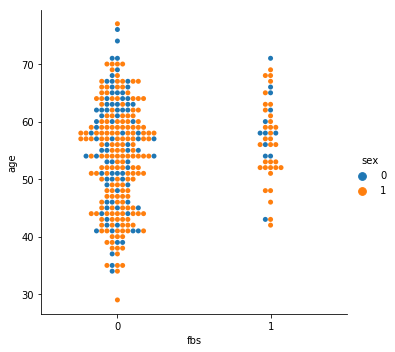

In [56]:
# Visualizing fasting blood sugar in males vs females with age on x-axis : 
# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

sns.catplot(x="fbs", y="age", hue="sex", kind = "swarm", data=data_heart)

# majority of the population resides in the fasting blood sugar < 120 mg/dL 

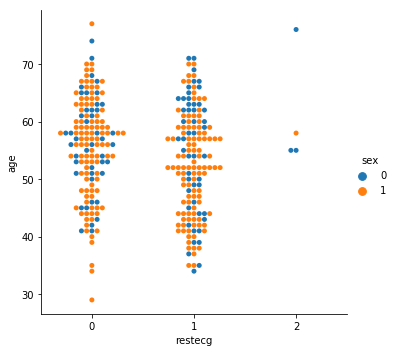

In [61]:
# visualizing the rest_ecg with respect to age 

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

sns.catplot(x="restecg" , y = "age" , hue = "sex" , kind = "swarm" , data=data_heart)

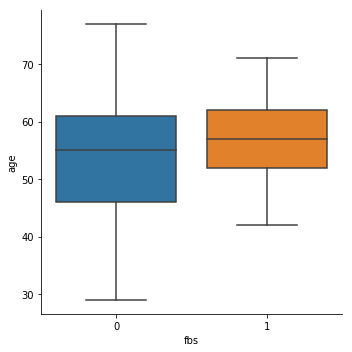

In [67]:
# fbs boxplot 
sns.catplot(x="fbs", y="age", kind="box", data=data_heart)

# fbs with respect to males 
# sns.catplot(x="fbs", y="age", kind="box",data=data_heart_male)
# sns.catplot(x="fbs", y="age", kind="box",data=data_heart_female)

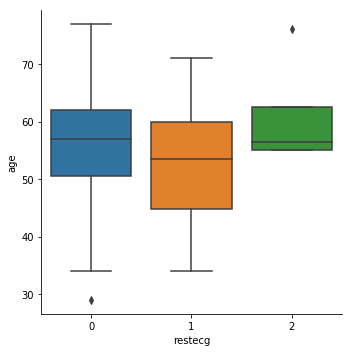

In [74]:
sns.catplot(x="restecg", y="age", kind="box",data=data_heart)

In [66]:
data_heart.columns

Index([u'age', u'sex', u'cp', u'trtbps', u'chol', u'fbs', u'restecg',
       u'thalachh', u'exng', u'oldpeak', u'slp', u'caa', u'thall', u'output'],
      dtype='object')

In [46]:
# Predicting heart risk based on these features : 
# cholestrol, resting blood pressure and maximum heart rate achieved

data_heart.columns
data_heart.head(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [75]:
# Prediction/Classification of heart attack on the basis of following features : 

feature_cols = ['trtbps', 'chol', 'thalachh'] 
#target_cols = ['output']

X = data_heart[feature_cols]
# recall y has to be a pandas series
Y = data_heart.output

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

# import model 
from sklearn.linear_model import LogisticRegression

# instantiate model 
logreg = LogisticRegression()

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
#X_train.shape
#Y_train.shape
#X_test.shape
#Y_test.shape

# fit the model on the data 
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
# perform prediction 
Y_pred = logreg.predict(X_test)

In [78]:
# calculate RMSE error between Y_test and Y_pred
# and see how it changes if you remove one feature from the feature_cols

from sklearn import metrics
import numpy as np 
# print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
# 0.5619514869490163

print(metrics.accuracy_score(Y_test,Y_pred))


0.6842105263157895


In [79]:
# remove chol and see how the rmse value changes : 
feature_cols = ['trtbps', 'thalachh', 'age']

X = data_heart[feature_cols]
Y = data_heart.output

# train_test split
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1)

# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

In [80]:
#fit the model
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
Y_pred_new = logreg.predict(X_test)

In [165]:
# For the logistic regression model print the confusion matrix
metrics.confusion_matrix(Y_test,Y_pred)

array([[21, 14],
       [10, 31]], dtype=int64)

In [223]:
# splice the confusion matrix into 4 parts : TP,TN,FP,FN

confusion_heartmat = metrics.confusion_matrix(Y_test,Y_pred)
TP = confusion_heartmat[1,1]
TN = confusion_heartmat[0,0]
FP = confusion_heartmat[0,1]
FN = confusion_heartmat[1,0]

In [168]:
# calculate RMSE error between Y_test and Y_pred_new
# print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_new)))
# 0.5735393346764044

print(metrics.accuracy_score(Y_test,Y_pred_new))

0.6710526315789473


In [227]:
# accuracy : TP+TN/TP+TN+FP+FN
print(1-metrics.accuracy_score(Y_test,Y_pred))

0.3157894736842105


In [220]:
# when actual value is positive, how often is the prediction correct : 
#TP/TP+FN

# TPR  = sensitivity = Recall : 
metrics.recall_score(Y_test,Y_pred)

0.7560975609756098

In [224]:
# FPR - specificity  
print(FP/float(FP+TN))

0.4


In [226]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.68      0.60      0.64        35
          1       0.69      0.76      0.72        41

avg / total       0.68      0.68      0.68        76



In [216]:
# Draw the ROC-AUC-Curve : 

# calculate Y_pred_prob
Y_pred_prob = logreg.predict_proba(X_test)[:,1]
#Y_test.shape
#Y_pred_prob.shape

fpr, tpr, threshold = metrics.roc_curve(Y_test,Y_pred_prob)

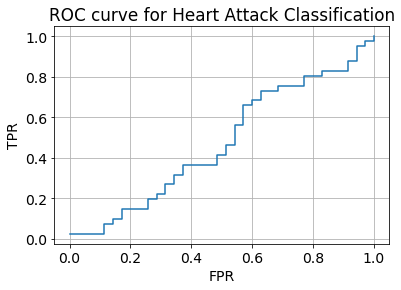

In [219]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14 

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Heart Attack Classification')
plt.grid(True)

In [232]:
# Let us use a different model to see if the accuracy can be improved : 
# Let us use random forest classifier : 

from sklearn.ensemble import RandomForestClassifier

# instantiate
rf_model = RandomForestClassifier(max_depth=2, random_state=0)

feature_cols = ['trtbps', 'chol', 'thalachh'] 
#target_cols = ['output']

X = data_heart[feature_cols]
# recall y has to be a pandas series
Y = data_heart.output

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

In [233]:
# fit the model
rf_model.fit(X_train, Y_train)

# store prediction values
Y_pred_rf_model = rf_model.predict(X_test)

# test the accuracy score 
print(metrics.accuracy_score(Y_test,Y_pred_rf_model))

0.6973684210526315


Text(0.5,11,'Predicted')

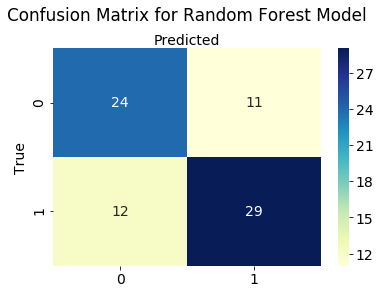

In [237]:
conf_matrix_rf_model = metrics.confusion_matrix(Y_test, Y_pred_rf_model)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_rf_model), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix for Random Forest Model', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [235]:
metrics.confusion_matrix(Y_test,Y_pred_rf_model)

array([[24, 11],
       [12, 29]], dtype=int64)

In [236]:
metrics.confusion_matrix(Y_test,Y_pred)

array([[21, 14],
       [10, 31]], dtype=int64)

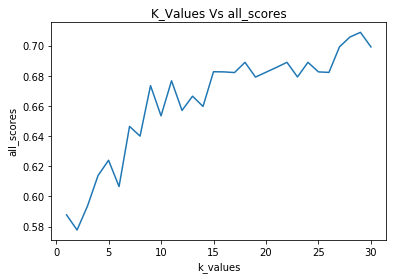

In [163]:
# Future Work - Additional Improvements for accuracy to be tested in future : 

# # Use linear regression with cross validation to build model, do prediction and test it's accuracy : 

# from sklearn.linear_model import LinearRegression
# linreg = LinearRegression()

# from sklearn.cross_validation import cross_val_score
# mse_scores = cross_val_score(linreg,X,Y,cv=10,scoring = 'mean_squared_error') 

# pos_mse_scores = -mse_scores
# # print(pos_mse_scores)
# import numpy as np
# rmse_scores = np.sqrt(pos_mse_scores)
# print(rmse_scores.mean())

# # test model by removing cholestrol levels 
# feature_cols = ['trtbps', 'thalachh'] 
# #target_cols = ['output']

# X = data_heart[feature_cols]
# # recall y has to be a pandas series
# Y = data_heart.output

# mse_scores_2 = cross_val_score(linreg,X,Y,cv=10,scoring = 'mean_squared_error') 
# print(mse_scores_2)

# pos_mse_scores_2 = -mse_scores_2
# rmse_scores_2 = np.sqrt(pos_mse_scores_2)
# print(rmse_scores_2.mean())

# # Use KNN for prediction 

# from sklearn.neighbors import KNeighborsClassifier

# # find optimal value of k between 1 to 31 for this 

# k_values = range(1,31)
# all_scores = []
# for k in k_values : 
#     # instantiate
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # score calculation
#     scores = cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
#     # append
#     all_scores.append(scores.mean())
    
    
# # Very Very Very Intersting : I am achieving an accuracy of 70 % when input to cross_val_score is X and Y. 
# import numpy as np 
# #np.mean(all_scores)
# #print(all_scores)
# max(all_scores)

# print(all_scores)

# max(all_scores)

# # plot K-value corresponding to accuracy 
# import matplotlib.pyplot as plt
  
# plt.plot(k_values, all_scores)
# plt.title('K_Values Vs all_scores')
# plt.xlabel('k_values')
# plt.ylabel('all_scores')
# plt.show()

# # n_neighbors = 29

# knn = KNeighborsClassifier(n_neighbors=29)
# knn.fit(X_train,Y_train)
# Y_pred_best_knn_model = knn.predict(X_test)
# print(metrics.accuracy_score(Y_test,Y_pred_best_knn_model))

# ## Accuracy decreased for some reason. 